In [68]:
import pandas as pd
df = pd.read_csv('problem1.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


1. 데이터 확인 및 전처리

- 데이터 EDA 수행
- 결측치를 확인하고 처리 방안에 대해 논의하라.
- 데이터 분할 방법 설명
- 최종 데이터셋이 적절함을 주장하라.


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [70]:
int_columns = ['year','month','day']

for column in int_columns:
    df[column] = df[column].astype(str)

In [71]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [72]:
df['date'] = df[['year','month','day']].apply("-".join,axis=1)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,2016-1-1
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2016-1-2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,2016-1-3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,2016-1-4
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2016-1-5


In [73]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            348 non-null    object        
 1   month           348 non-null    object        
 2   day             348 non-null    object        
 3   week            348 non-null    object        
 4   temp_2          348 non-null    int64         
 5   temp_1          348 non-null    int64         
 6   average         348 non-null    float64       
 7   actual          348 non-null    int64         
 8   forecast_noaa   348 non-null    int64         
 9   forecast_acc    348 non-null    int64         
 10  forecast_under  348 non-null    int64         
 11  friend          348 non-null    int64         
 12  date            348 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 35.5+ KB


In [74]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,2016-01-01
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2016-01-02
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,2016-01-03
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,2016-01-04
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2016-01-05


In [75]:
df.drop(columns=['year','month','day','week'],axis=1,inplace=True)
df.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
0,45,45,45.6,45,43,50,44,29,2016-01-01
1,44,45,45.7,44,41,50,44,61,2016-01-02
2,45,44,45.8,41,43,46,47,56,2016-01-03
3,44,41,45.9,40,44,48,46,53,2016-01-04
4,41,40,46.0,44,46,46,46,41,2016-01-05


In [76]:
df.isna().sum()

temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
date              0
dtype: int64

데이터에 결측치는 존재하지 않는 것을 확인

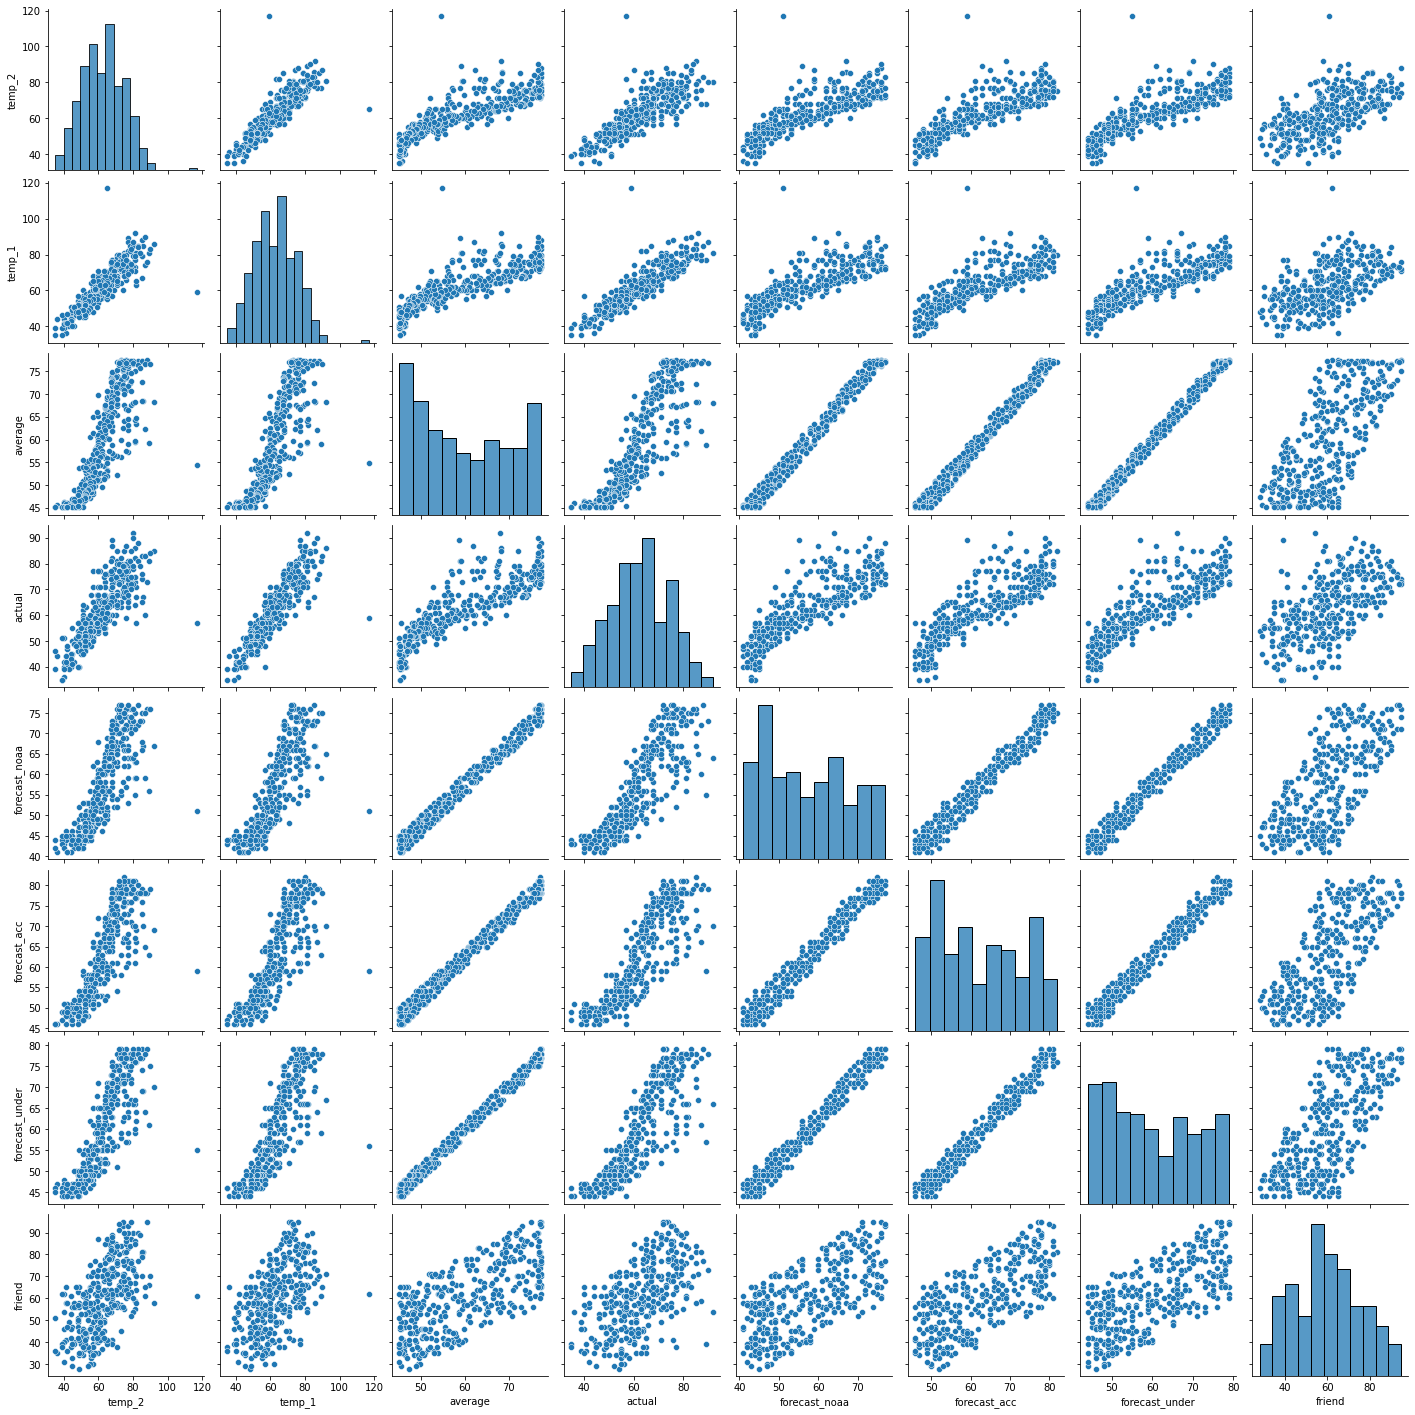

In [77]:
import seaborn as sns
sns.pairplot(df)

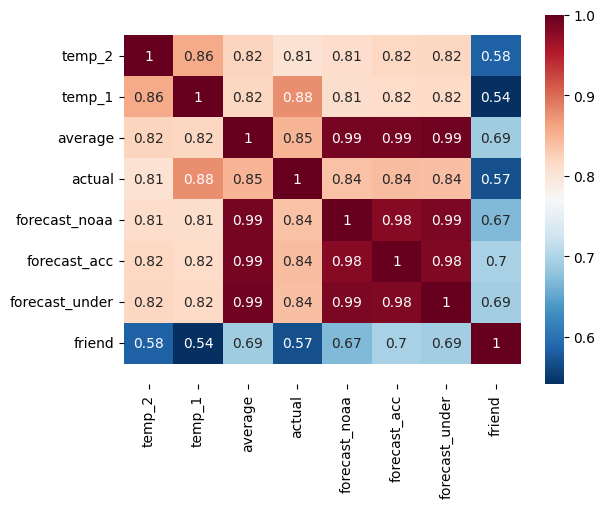

In [87]:
import matplotlib.pyplot as plt
df_corr = df.drop(columns=['date']).corr(method='pearson')

ax = sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels = df_corr.columns,
            cmap='RdBu_r',annot=True)
buttom,top = ax.get_ylim()
ax.set_ylim(buttom+0.5,top-0.5)
plt.show()


모든 변수간 상관관계가 상당히 높게 나오는 것을 확인

friend 변수와 date 변수는 예측하는데에 필요하지 않을 것으로 판단하여 삭제 처리

In [88]:
df = df.drop(columns=['date','friend'])
df.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under
0,45,45,45.6,45,43,50,44
1,44,45,45.7,44,41,50,44
2,45,44,45.8,41,43,46,47
3,44,41,45.9,40,44,48,46
4,41,40,46.0,44,46,46,46


In [90]:
df.describe()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989
std,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256
min,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000
25%,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000
50%,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000
75%,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000
max,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000


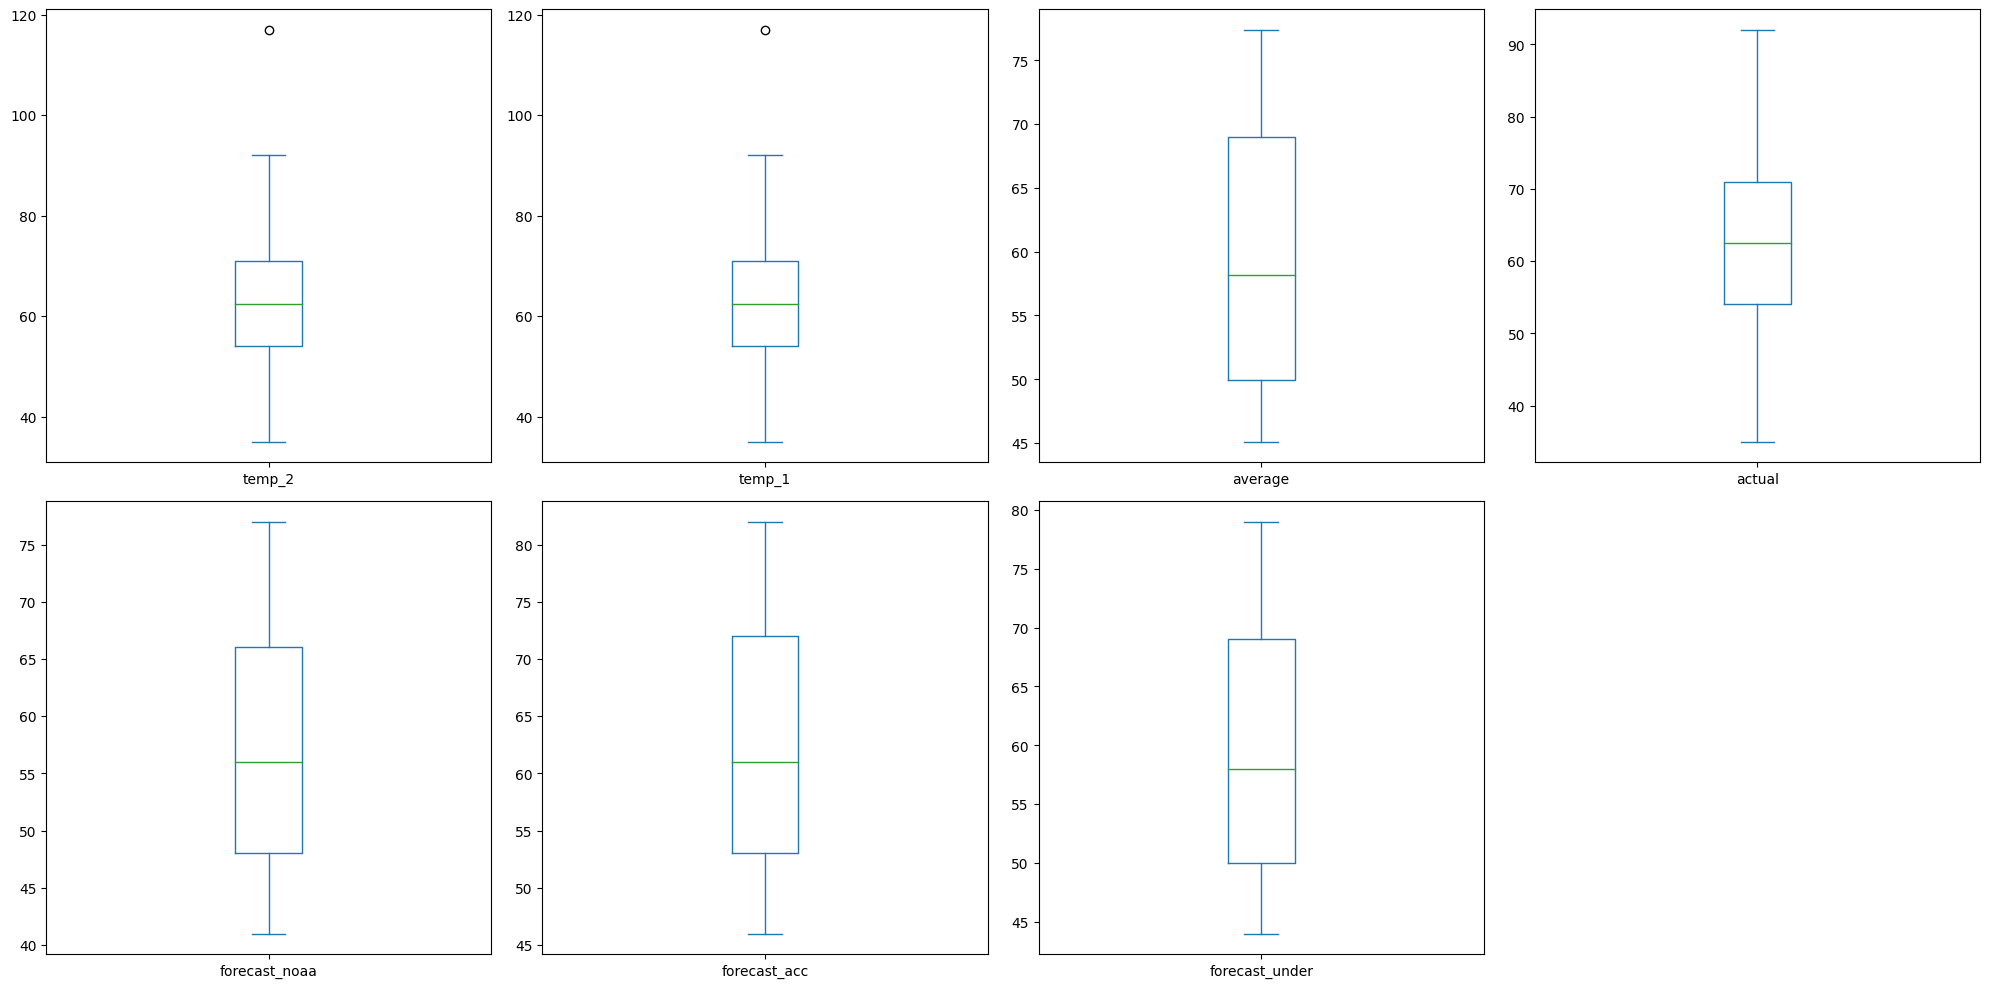

In [91]:
#이상치 확인
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(20,10))
plt.tight_layout()
plt.show()

'temp_1', 'temp_2' 컬럼에서 이상치가 감지되기는 하지만, 많은 양의 이상치가 존재하지는 않기 때문에 무시하고 분석 진행

train/test 데이터셋을 8:2로 나누어서 진행

In [89]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['actual'])
y = df['actual']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

(278, 6) (70, 6)
(278,) (70,)


In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc_train = sc.fit_transform(x_train)
x_sc_test = sc.transform(x_test)

2. Random Forest 모델 적합 및 검증

- RandomForest 학습 및 예측 결과 해석
- 예측 결과 검정 해석, 중요변수 도출
- 변수 중요성 분석 및 그래프 출력

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_sc_train,y_train)
pred = rf.predict(x_sc_test)

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)


print("MSE\t{}".format(round(mse,3)))
print("MAE\t{}".format(round(mae,3)))
print("RMSE\t{}".format(round(rmse,3)))
print("r2 score\t{}".format(round(r2,3)))

MSE	27.311
MAE	4.227
RMSE	5.226
r2 score	0.82


In [103]:
print(rf.score(x_sc_test,y_test))

0.8202663823843452


In [100]:
# 중요 변수
importances = rf.feature_importances_
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm,
                               pd.DataFrame(importances)],
                               axis=1)
feature_importances.columns = ['feture_nm','importances']
print(feature_importances)

        feture_nm  importances
0          temp_2     0.026113
1          temp_1     0.440911
2         average     0.376441
3   forecast_noaa     0.082587
4    forecast_acc     0.055705
5  forecast_under     0.018243


temp_1의 중요도가 가장 높은것을 확인

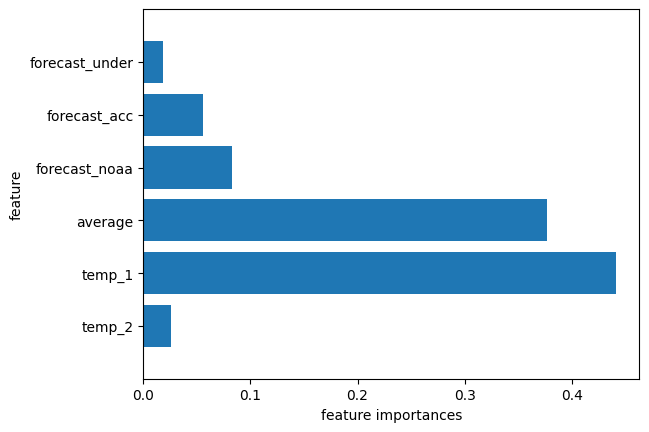

In [101]:
# 변수 중요도 확인
n_features = x_train.shape[1]
importances = rf.feature_importances_
column_nm = x.columns

plt.barh(range(n_features),importances,align='center')
plt.yticks(np.arange(n_features),column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')

plt.ylim(-1, n_features)
plt.show()

3. SVM 모델 적합 및 검증

- svm 학습 및 예측 결과 해석
- 예측 결과 검정 해석, 중요 변수 도출
- 변수 중요성 분석 및 그래프 출력

In [102]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear',C=100, gamma='auto')
svr_poly = SVR(kernel='poly',C=100, gamma='auto',degree=3,epsilon = 0.1, coef0=0.1)

svr_rbf.fit(x_sc_train, y_train)
svr_lin.fit(x_sc_train, y_train)
svr_poly.fit(x_sc_train, y_train)

SVR(C=100, coef0=0.1, gamma='auto', kernel='poly')

In [106]:
rbf_pred = svr_rbf.predict(x_sc_test)
lin_pred = svr_lin.predict(x_sc_test)
poly_pred = svr_poly.predict(x_sc_test)

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random Forest','Linear','Polynomial']
evls = ['mse','rmse','mae']

results = pd.DataFrame(index=kernel, columns= evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y_test,pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)
    
results

,mse,rmse,mae
Random Forest,25.75,5.07,3.93
Linear,21.45,4.63,3.71
Polynomial,28.42,5.33,4.0


linear, random forest, polynomial 순서대로 예측 성능이 좋은 것을 확인

svr은 따로 변수 중요도를 추출할 수 없다. 


4. 모델 비교 및 향후 개선 방향 도출

- Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?
- 모델링 관련 추후 개선 방향 제시

전체적인 정확도는 svm의 linear 모델이 가장 높다. 하지만 svm 모델로 예측을 진행하게 되면, 변수 중요도를 확인할 수 없기 때문에 최종적으로 랜덤 포레스트 모델을 선택하여 모델링을 진행한다. 